## Titanic Data Exploration ##

***

Over the past several weeks, you've learned the code about how to explore and manipulate a dataset. Now it's time to practice what you've learned on a real-world dataset. 

***

### Titanic Dataset

The titanic dataset holds information about the passengers on the titanic. This includes passenger name, characteristics, and if they survived the accident. The dataset has the following columns:

    * pclass = passenger class; 1 = first class, 2 = second class, 3 = third class
    * survived = passenger survival; 1 = survived, 0 = did not survive
    * name = passenger name
    * sex = sex of passenger
    * age = age of passenger
    * sibsp = # of siblings / spouses aboard the Titanic
    * parch = # of parents / children aboard the Titanic
    * ticket = ticket number
    * fare = fare paid by passenger
    * cabin = passenger cabin
    * embarked = port of embarkation; C = Cherbourg, Q = Queenstown, S = Southampton
    * boat = lifeboat assignment 
    * body = recovered body number
    * home dest = anticipated home destination 
    
If you need some additional motivation before starting, please visit: https://www.youtube.com/watch?v=3gK_2XdjOdY

### How to work through the dataset:

Follow the prompts below to explore, manipulate, and visualize aspects of the dataset. Working with data takes time, so take your time as you start with a messy dataset and turn it into something that shows meaningful visualizations. 

***


### Import Libraries and Dataset

* Review the entire notebook to determine what you will be expected to do - then, import the necessary libraries
* Import the titanic.xlsx dataset

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns


%matplotlib inline

In [2]:
df = pd.read_excel("titanic.xlsx")

In [3]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


### Determine the Characteristics of the Dataset

   * How many columns are in this dataset?
   * How many rows are in this dataset?
   * What types of data are in each column? Does this make sense with that you know about that column?
   * Which variables are numeric? Which variables are categorical? What other variables are left outside of these two groups?
   * Which variable could be considered a 'dependent' variable?

In [5]:
df.shape  # 1309 rows 14 columns

(1309, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [7]:
# pclass      int64   categorical
# survived    int64   categorical
# name        object  categorical
# sex         object  categorical
# cabin       object  categorical
# embarked    object  categorical
# home.dest   object  categorical

# age         float64 numerical
# sibsp       int64   numerical
# parch       int64   numerical
# ticket      object  numerical
# fare        float64 numerical
# boat        object  numerical
# body        float64 numerical

In [8]:
# ticket and boat represent numbers but are object types
# pclass and survived are categorical but represented by numbers.

In [9]:
# survived is the dependent variable 

In [10]:
df["survived"].value_counts()

0    809
1    500
Name: survived, dtype: int64

### Identify the Missing Data in the Dataset

   * Is there any missing data?
   * Which columns have any missing data?
   * Which column has the most missing information? Which column has the least?

In [11]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [12]:
# age           263
# fare            1
# cabin        1014
# embarked        2
# boat          823
# body         1188
# home.dest     564


In [13]:
# body = recovered body number has the most null data, but numbers were only assigned 
# to recovered bodies not missing persons or survivors and some missing values would be expected

#df["survived"].value_counts()
# 0    809
# 1    500
# Name: survived, dtype: int64
# of 1309 passengers 500 survived 809 did not 
# 1309 - 1188 = 121 values for bodies recovered 
# df["body"].max() = 328
# 328 - 121 = 207 missing values for recovered bodies or 207/328 = 60% missing data where values would be expected


In [14]:
# fare has the least missing data with one fare missing
df.loc[df["fare"].isna() == True]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1225,3,0,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,NaN,261.0,NaN


### Handling the Missing Data in the Dataset

   * Remove the columns with excessive missing data (any column missing greater than 500 rows)
   * When there is very little missing data, we can make replacements. Replace the missing data for the "embarked" column with the most common embarkation point. 
   * Replace the missing data in "fare" with the average fare of the entire sample. 
   * Remove the rows in the dataset that has missing "age" data. 
   * Recheck is there is any data missing in the dataset. 

In [15]:
# cabin        1014
# boat          823
# body         1188
# home.dest     564
list(df.columns[(df.isna().sum() > 500)])

['cabin', 'boat', 'body', 'home.dest']

In [16]:
#df.drop(columns = ["cabin","boat","body","home.dest"],inplace = True)
df.drop(columns = list(df.columns[(df.isna().sum() > 500)]), inplace = True)

In [17]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S


In [18]:
# Replace the missing data for the "embarked" column with the most common embarkation point. 

In [19]:
df.loc[df["embarked"].isna()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
168,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [20]:
df["embarked"].fillna(df["embarked"].mode()[0],inplace = True)

In [21]:
df["embarked"].isna().sum()

0

In [22]:
# Replace the missing data in "fare" with the average fare of the entire sample

In [23]:
df["fare"].fillna(df["fare"].mean(),inplace = True)

In [24]:
# Remove the rows in the dataset that has missing "age" data. 

In [25]:
df.dropna(subset = "age",inplace = True)

In [26]:
df.isna().sum() # no na values

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

In [27]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1046 non-null   int64  
 1   survived  1046 non-null   int64  
 2   name      1046 non-null   object 
 3   sex       1046 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1046 non-null   int64  
 6   parch     1046 non-null   int64  
 7   ticket    1046 non-null   object 
 8   fare      1046 non-null   float64
 9   embarked  1046 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 89.9+ KB


In [28]:
df.shape # dropped 4 columns, 263 rows

(1046, 10)

### Creating Columns and Replacing Labels

   * Create descriptive labels for the categorical columns: pclass, survived, and embarked. Instead of the coding that shows in the dataset, create labels to describe what each category represents (i.e. in the embarked column S = Southhampton)
   * Create a new column called "Titanic Passenger" and make all values 1
   * Create a new column called "Family Size" - this column should equal the total number of family members each passenger was traveling with.
   * Create a column called "Travel Alone" - this column should be 1 if the passenger was traveling alone, and 0 if the passenger was traveling with family. 
   * Create a column called "Has Caregiver" - this column should have a value of 1 if a passenger is less than 13-years old AND the passenger is traveling with at least one family member, otherwise the value should be 0. 
   * Create a column called "Crew" - this column should be 1 if the passenger paid 0 dollars for their ticket, and 0 otherwise. 
   * Create a column called "Age Group" to group passengers by their age (create five categories: infant, child, teen, adult, senior). You can use bins to complete this (or any other method you like). You define the cutoff points for each group you create. 
   
After create new columns, replace the basic coding "0/1" with meaningful labels. 

In [29]:
# Create descriptive labels for the categorical columns: pclass, survived, 
#     and embarked. Instead of the coding that shows in the dataset, 
#     create labels to describe what each category represents 
# pclass  1 = first class, 2 = second class, 3 = third class
# survived - 0 = no 1 = yes
# embarked C = Cherbourg, Q = Queenstown, S = Southampton

In [30]:
df["pclass"].replace([1,2,3],["first class","second class","third class"],inplace = True)

In [31]:
df["survived"].replace([0,1],["not survived","survived"],inplace = True)

In [32]:
df["embarked"].replace(["C","Q","S"],["Cherbourg","Queenstown","Southampton"],inplace = True)

In [33]:
# Create a new column called "Titanic Passenger" and make all values 1

In [34]:
df["Titanic Passenger"] =  1

In [35]:
df["Titanic Passenger"].replace(1,"yes",inplace=True)

In [36]:
# Create a new column called "Family Size" - this column should equal the total number of family
# members each passenger was traveling with

In [37]:
df["Family Size"] = df["sibsp"] + df["parch"]

In [38]:
# Create a column called "Travel Alone" - this column should be 1 if the passenger was traveling alone, and 0 if the passenger was traveling with family. 

In [39]:
df["Travel Alone"] = np.where((df["Family Size"] == 0 ),1,0)

In [40]:
df["Travel Alone"].replace([0,1],["no","yes"],inplace=True)

In [41]:
#Create a column called "Has Caregiver" - this column should have a value of 1 if a passenger is less than 13-years old AND the passenger is traveling with at least one family member, otherwise the value should be 0. 

In [42]:
df["Has Caregiver"] = np.where(((df["age"] < 13 )& (df["Family Size"] > 0)),1,0)

In [43]:
df["Has Caregiver"].replace([0,1],["no","yes"],inplace=True)

In [44]:
#Create a column called "Crew" - this column should be 1 if the passenger paid 0 dollars for their ticket, and 0 otherwise. 

In [45]:
df["Crew"] = np.where((df["fare"] == 0),1,0)

In [46]:
df["Crew"].replace([0,1],["no","yes"],inplace=True)

In [47]:
#Create a column called "Age Group" to group passengers by their age (create five categories: infant, child, teen, adult, senior). You can use bins to complete this (or any other method you like). You define the cutoff points for each group you create.

In [48]:
bins = [0,2,12,18,65,100]
bin_labels = ["infant", "child", "teen", "adult", "senior"]

In [49]:
df["Age Group"] = pd.cut(df["age"], bins, labels = bin_labels)


In [50]:
df.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,Titanic Passenger,Family Size,Travel Alone,Has Caregiver,Crew,Age Group
0,first class,survived,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,Southampton,yes,0,yes,no,no,adult
1,first class,survived,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,Southampton,yes,3,no,yes,no,infant
2,first class,not survived,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,Southampton,yes,3,no,yes,no,infant


### Determine Frequencies of Groups

* How many passengers fall into each category? Determine how many passengers fall into each group for <b>each</b> categorical vairable (including the ones you just created). 

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   pclass             1046 non-null   object  
 1   survived           1046 non-null   object  
 2   name               1046 non-null   object  
 3   sex                1046 non-null   object  
 4   age                1046 non-null   float64 
 5   sibsp              1046 non-null   int64   
 6   parch              1046 non-null   int64   
 7   ticket             1046 non-null   object  
 8   fare               1046 non-null   float64 
 9   embarked           1046 non-null   object  
 10  Titanic Passenger  1046 non-null   object  
 11  Family Size        1046 non-null   int64   
 12  Travel Alone       1046 non-null   object  
 13  Has Caregiver      1046 non-null   object  
 14  Crew               1046 non-null   object  
 15  Age Group          1046 non-null   category
dtypes: cat

In [52]:
#  pclass, sex, survived,  embarked, Travel Alone, 
#  Crew, Age Group, Has Caregiver

for col in df.columns:
    print("*"*5, col,"*"*5)
    
    print(df[col].value_counts(normalize=True))
    print()     

***** pclass *****
third class     0.478967
first class     0.271511
second class    0.249522
Name: pclass, dtype: float64

***** survived *****
not survived    0.591778
survived        0.408222
Name: survived, dtype: float64

***** name *****
Kelly, Mr. James                           0.001912
Connolly, Miss. Kate                       0.001912
Allen, Miss. Elisabeth Walton              0.000956
de Messemaeker, Mr. Guillaume Joseph       0.000956
Dean, Miss. Elizabeth Gladys "Millvina"    0.000956
                                             ...   
Dibden, Mr. William                        0.000956
Doling, Miss. Elsie                        0.000956
Doling, Mrs. John T (Ada Julia Bone)       0.000956
Downton, Mr. William James                 0.000956
Zimmerman, Mr. Leo                         0.000956
Name: name, Length: 1044, dtype: float64

***** sex *****
male      0.629063
female    0.370937
Name: sex, dtype: float64

***** age *****
24.0000    0.044933
22.0000    0.041109
21.00

### Determine the Distribution of Numeric Data

* What are the summary statistics for <b>each</b> numeric variable in the dataset? Summary statistics include:
    * Mean
    * Median
    * Mode
    * Standard Deviation
    * Range

In [53]:
df.describe()

,age,sibsp,parch,fare,Family Size
count,1046.000000,1046.000000,1046.00000,1046.000000,1046.000000
mean,29.881135,0.502868,0.42065,36.682839,0.923518
std,14.413500,0.912167,0.83975,55.705959,1.452891
min,0.166700,0.000000,0.00000,0.000000,0.000000
25%,21.000000,0.000000,0.00000,8.050000,0.000000
50%,28.000000,0.000000,0.00000,15.800000,0.000000
75%,39.000000,1.000000,1.00000,35.500000,1.000000
max,80.000000,8.000000,6.00000,512.329200,10.000000


In [54]:
# range
for col in  df.select_dtypes('number').columns:
    print(f"{col} Range: {df[col].max() - df[col].min()} ")

age Range: 79.8333 
sibsp Range: 8 
parch Range: 6 
fare Range: 512.3292 
Family Size Range: 10 


### Relationships between Variables

* Determine the relationship between each variable and the variable "survived". This is our primary variable of interest -- did this passenger survive the accident? Did the characteristics of the passenger have any relationship with their survival?
    * <b>pclass</b>: how many survivors are in each passenger class? does a pattern emerge? which class has the most survivors? which has the least?
    * <b>sex</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>age</b>: how does the average age of the passenger differ based on survival group? 
    * <b>age group</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>family size</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>travel alone</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>crew</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>has caregiver</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>fare</b>: how does the average fare the passenger paid differ based on survival group? 
    * <b>embarked</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    
Based on what you learn working through this section, make (2) statements about what characteristics of passenger most influenced their survival.

In [55]:
df.corr()

C:\Users\RobSquatch\AppData\Local\Temp\ipykernel_8328\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,sibsp,parch,fare,Family Size
age,1.000000,-0.243699,-0.150917,0.178229,-0.240230
sibsp,-0.243699,1.000000,0.374456,0.141195,0.844260
parch,-0.150917,0.374456,1.000000,0.216726,0.813080
fare,0.178229,0.141195,0.216726,1.000000,0.213911
Family Size,-0.240230,0.844260,0.813080,0.213911,1.000000


In [56]:
# pclass,sex,age,age group,family size,travel alone,crew,has caregiver,fare,embarked

In [57]:
columns = ["pclass","sex","age","Age Group","Family Size","Travel Alone","Crew","Has Caregiver","fare","embarked"]

for col in  columns:
    print("**",col,"**")
    if col in df.select_dtypes('number').columns:
        print(f"{df[col].groupby(df['survived']).mean()} " )
        print()
    print(f"{df[col].groupby(df['survived']).value_counts()} " )
    print()
    print(f"{col} normalized")
    print(f"{df[col].groupby(df['survived']).value_counts(normalize=True)} " )
    print(f"{df['survived'].groupby(df[col]).value_counts(normalize=True)} " )
    print()

** pclass **
survived      pclass      
not survived  third class     370
              second class    146
              first class     103
survived      first class     181
              third class     131
              second class    115
Name: pclass, dtype: int64 

pclass normalized
survived      pclass      
not survived  third class     0.597738
              second class    0.235864
              first class     0.166397
survived      first class     0.423888
              third class     0.306792
              second class    0.269321
Name: pclass, dtype: float64 
pclass        survived    
first class   survived        0.637324
              not survived    0.362676
second class  not survived    0.559387
              survived        0.440613
third class   not survived    0.738523
              survived        0.261477
Name: survived, dtype: float64 

** sex **
survived      sex   
not survived  male      523
              female     96
survived      female    292
         

In [93]:

for col in  columns: 
    print(f"{pd.crosstab(df['survived'], df[col], margins = True, normalize = False)}")
    print()

pclass        first class  second class  third class   All
survived                                                  
not survived          103           146          370   619
survived              181           115          131   427
All                   284           261          501  1046

sex           female  male   All
survived                        
not survived      96   523   619
survived         292   135   427
All              388   658  1046

age           0.1667  0.3333  0.4167  0.6667  0.75  0.8333  0.9167  1.0  2.0  \
survived                                                                       
not survived       0       1       0       0     1       0       0    3    8   
survived           1       0       1       1     2       3       2    7    4   
All                1       1       1       1     3       3       2   10   12   

age           3.0  ...  65.0  66.0  67.0  70.0  70.5  71.0  74.0  76.0  80.0  \
survived           ...                                   

In [99]:
# pclass: how many survivors are in each passenger class? does a pattern emerge? 
# which class has the most survivors? which has the least?

# The lower the passenger class had more passengers not survive in total,while first class has the least. 
# When looking at normalized survival rates, the third class had the highest percent of not surviving and
# first class had the highest rate of survival

# pclass        first class  second class  third class   All
# survived                                                  
# not survived          103           146          370   619
# survived              181           115          131   427
# All                   284           261          501  1046


# pclass normalized
# survived      pclass      
# not survived  third class     0.597738
#               second class    0.235864
#               first class     0.166397
# survived      first class     0.423888
#               third class     0.306792
#               second class    0.269321


# pclass        survived    
# first class   survived        0.637324
#               not survived    0.362676
# second class  not survived    0.559387
#               survived        0.440613
# third class   not survived    0.738523
#               survived        0.261477


In [100]:
#     sex: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?

# Woman had a much higher survival rate than men

# sex           female  male   All
# survived                        
# not survived      96   523   619
# survived         292   135   427
# All              388   658  1046

# sex normalized
# survived      sex   
# not survived  male      0.844911
#               female    0.155089
# survived      female    0.683841
#               male      0.316159


# sex     survived    
# female  survived        0.752577
#         not survived    0.247423
# male    not survived    0.794833
#         survived        0.205167


In [60]:
#  age: how does the average age of the passenger differ based on survival group?

# The age of survivors is slightly higher than not surviving.  

# age            All  
# survived            
# not survived   619  
# survived       427  
# All           1046

# ** age **
# survived
# not survived    30.545369
# survived        28.918228


In [61]:
#  age group: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?

# Infants,children, teens, and adults had the same rates of survival. Seniors had the highest rate of survival. 

# Age Group     infant  child  teen  adult  senior   All
# survived                                              
# not survived      13     27    58    513       8   619
# survived          21     33    41    330       2   427
# All               34     60    99    843      10  1046

# Age Group normalized
# survived      Age Group
# not survived  adult        0.828756
#               teen         0.093700
#               child        0.043619
#               infant       0.021002
#               senior       0.012924
# survived      adult        0.772834
#               teen         0.096019
#               child        0.077283
#               infant       0.049180
#               senior       0.004684


# Age Group  survived    
# infant     survived        0.617647
#            not survived    0.382353
# child      survived        0.550000
#            not survived    0.450000
# teen       not survived    0.585859
#            survived        0.414141
# adult      not survived    0.608541
#            survived        0.391459
# senior     not survived    0.800000
#            survived        0.200000


In [103]:
#     family size: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?

# The larger the family size, the higher the survival rate.  Passengers with no family had the highest non survival rate.
# 

# Family Size     0    1    2   3   4   5   6  7  10   All
# survived                                                
# not survived  402   93   63   9  11  20  12  8   1   619
# survived      188  113   81  30   6   5   4  0   0   427
# All           590  206  144  39  17  25  16  8   1  1046

# Family Size normalized
# survived      Family Size
# not survived  0              0.649435
#               1              0.150242
#               2              0.101777
#               5              0.032310
#               6              0.019386
#               4              0.017771
#               3              0.014540
#               7              0.012924
#               10             0.001616
# survived      0              0.440281
#               1              0.264637
#               2              0.189696
#               3              0.070258
#               4              0.014052
#               5              0.011710
#               6              0.009368

# ** Family Size **
# survived
# not survived    0.852989
# survived        1.025761





In [63]:
#     travel alone: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?

# Passengers traveling alone had a lower survival rate of  31.9 percent.
# Passengers not traveling alone had a higher survival rate of 44 percent.
# 

# Travel Alone   no  yes   All
# survived                    
# not survived  217  402   619
# survived      239  188   427
# All           456  590  1046

# Travel Alone normalized
# survived      Travel Alone
# not survived  yes             0.649435
#               no              0.350565
# survived      no              0.559719
#               yes             0.440281


# Travel Alone  survived    
# no            survived        0.524123
#               not survived    0.475877
# yes           not survived    0.681356
#               survived        0.318644


In [64]:
#     crew: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?

# Crew members had a lower survival  rate than passengers.

# Crew            no  yes   All
# survived                     
# not survived   613    6   619
# survived       425    2   427
# All           1038    8  1046

# Crew normalized
# survived      Crew
# not survived  no      0.990307
#               yes     0.009693
# survived      no      0.995316
#               yes     0.004684


# Crew  survived    
# no    not survived    0.590559
#       survived        0.409441
# yes   not survived    0.750000
#       survived        0.250000


In [65]:
#     has caregiver: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?

#  The survival rates for those with a caregiver was similar to those without

# Has Caregiver   no  yes   All
# survived                     
# not survived   580   39   619
# survived       375   52   427
# All            955   91  1046

# Has Caregiver normalized
# survived      Has Caregiver
# not survived  no               0.936995
#               yes              0.063005
# survived      no               0.878220
#               yes              0.121780 

# Has Caregiver  survived    
# no             not survived    0.607330
#                survived        0.392670
# yes            survived        0.571429
#                not survived    0.428571


In [66]:
#     fare: how does the average fare the passenger paid differ based on survival group?

# Survivors had a mean fare higer than those who did not survive.  This mathces with the higher survival rate of higher pclass

# ** fare **
# survived
# not survived    25.161913
# survived        53.384134

# print(f"{df['fare'].groupby(df['pclass']).mean()}" )
# pclass
# first class     92.229358
# second class    21.855044
# third class     12.920050


In [104]:
#     embarked: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?

# Passengers embarking from Queenstown had the lowest rate of survival.
# Passengers from Cherbourg had the highest rate of survival

# embarked      Cherbourg  Queenstown  Southampton   All
# survived                                              
# not survived         80          37          502   619
# survived            132          13          282   427
# All                 212          50          784  1046


# embarked normalized
# survived      embarked   
# not survived  Southampton    0.810985
#               Cherbourg      0.129241
#               Queenstown     0.059774
# survived      Southampton    0.660422
#               Cherbourg      0.309133
#               Queenstown     0.030445

# embarked     survived    
# Cherbourg    survived        0.622642
#              not survived    0.377358
# Queenstown   not survived    0.740000
#              survived        0.260000
# Southampton  not survived    0.640306
#              survived        0.359694


### Visualize your Results

* Using the most interesting (from your POV) results from the above section, create (3) visualizations to illustrate the results. 
* Create a barplot to show the variation in average age across passenger class. On average, which passenger class has the oldest passengers?
* Create a violin plot to show the distribution of age across passenger class. 

<Axes: xlabel='survived', ylabel='count'>

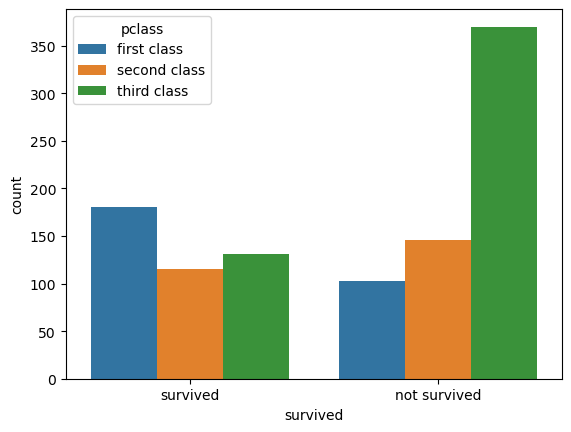

In [76]:
sns.countplot(data=df,x="survived",hue="pclass")

<Axes: xlabel='pclass', ylabel='count'>

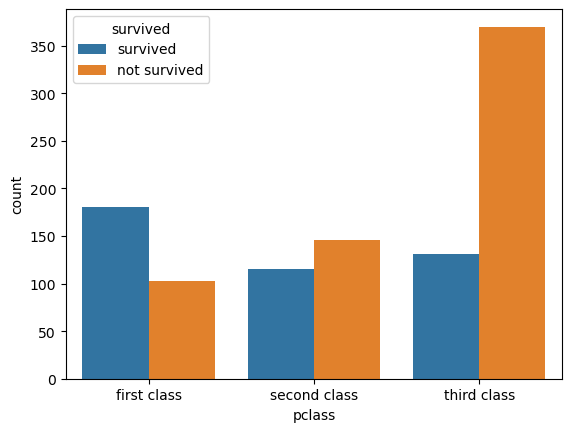

In [75]:
sns.countplot(data=df,x="pclass",hue="survived")

<Axes: xlabel='Family Size', ylabel='count'>

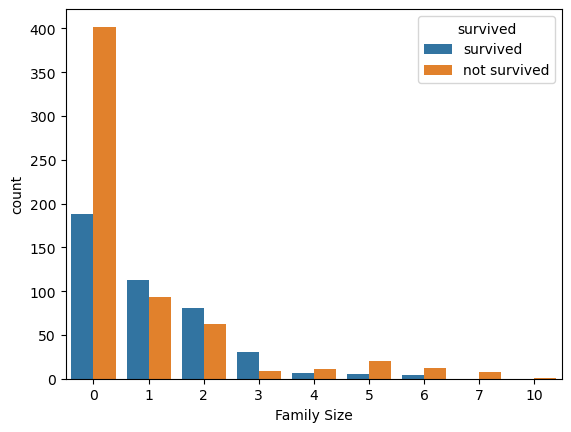

In [94]:
sns.countplot(data=df,x="Family Size",hue="survived")

<Axes: xlabel='Age Group', ylabel='count'>

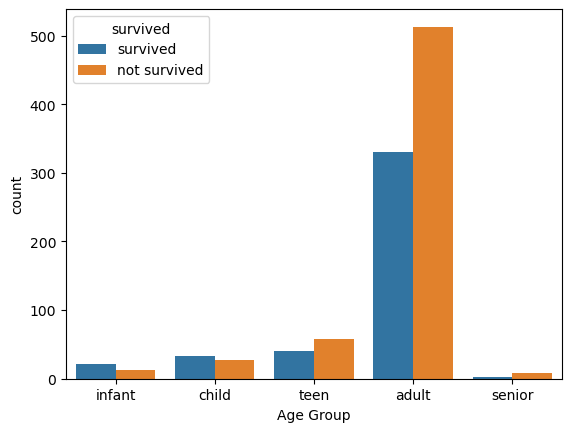

In [101]:
sns.countplot(data=df,x="Age Group",hue="survived")

<Axes: xlabel='embarked', ylabel='count'>

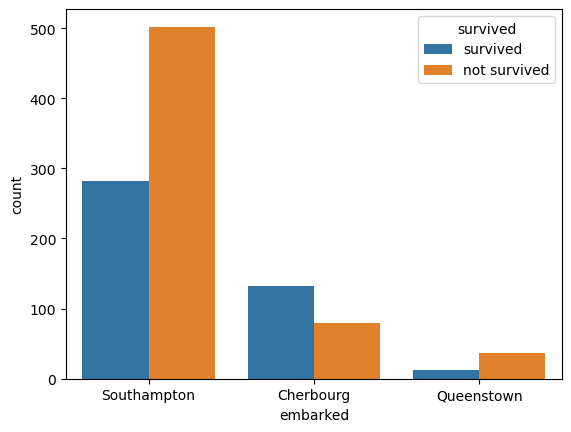

In [96]:
sns.countplot(data=df,x="embarked",hue="survived")

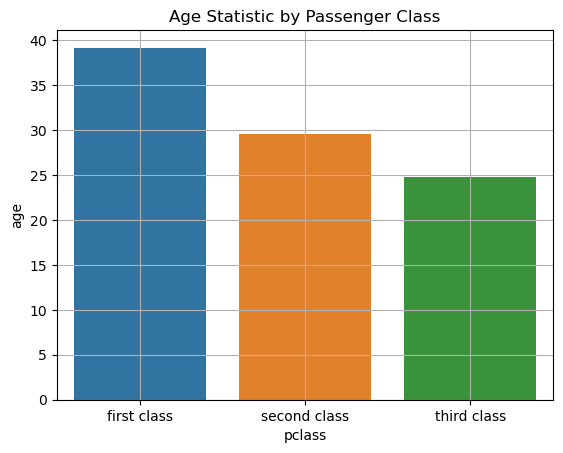

In [98]:
### creating a simple barplot to show the average age  across each pclass
sns.barplot(data = df, x = "pclass", y = "age", errorbar = None)
plt.title('Age Statistic by Passenger Class')
plt.grid()

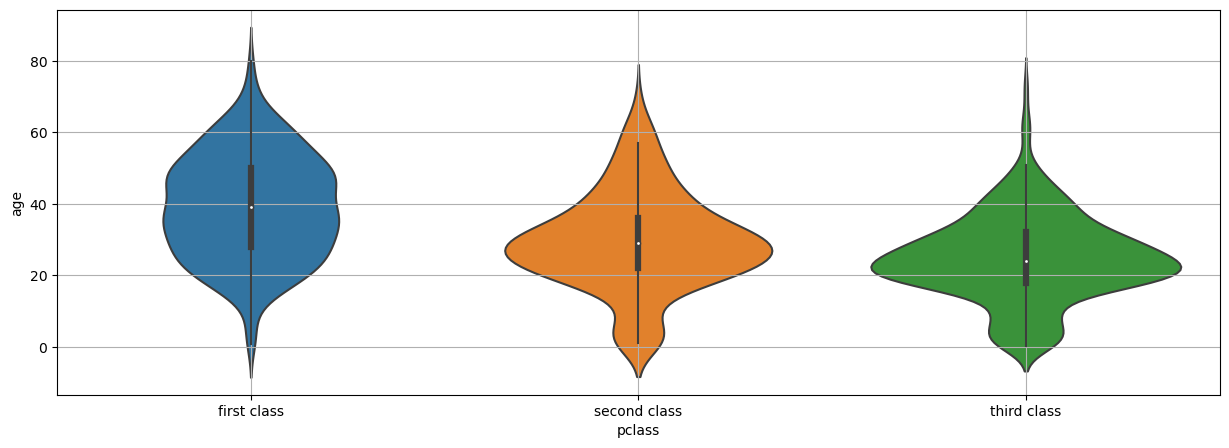

In [69]:
### Create a violin plot to show the distribution of age across passenger class. 
plt.figure(figsize=(15,5))
sns.violinplot(x = df["pclass"], y = df["age"])
plt.grid()